# Project Machine Learning ( phase 2 )

### -------Ahmed Ayman Ahmed Ali 1801094 -------Mazen Gasser Mohamed Arfan 1803484

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

#classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#acuraccy scores
from sklearn.metrics import precision_score , recall_score , precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

#visiualize decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image 
import pydotplus

# Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, -1].values


feature_cols = ["location" ,"country","gender","age","vis_wuhan","from_wuhan","symptom1","symptom2","symptom3","symptom4",\
                "symptom5","symptom6","diff_sym_hos"]

# Spliting dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42,shuffle = True)

# => KNN Classifier

## choose best CV for best recall

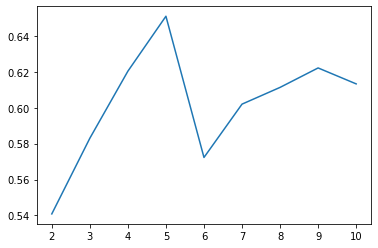

In [4]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(KNeighborsClassifier() , X_train, y_train, cv = i,scoring='recall')
    cv_scores.append(scores.mean())
    
plt.plot(i_range, cv_scores)

## Tuning K in KNN classifier

In [5]:
#tune K in Knn clf with range 1->30
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

param_grid = dict(    
    {
     'n_neighbors' : list(range(1, 31)),
     'weights' : ['uniform','distance'],
     'metric' : ['minkowski','euclidean','manhattan']
    }
)
  
# defining parameter range
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=False,verbose=1)

# fitting the model for grid search
grid_KNN.fit(X_train, y_train)
y_pred = grid_KNN.predict(X_test)
print(grid_KNN.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


## Confusion matrix

In [6]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[76  1]
 [ 2  8]]


In [7]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

KNN_score = ["KNN",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),recall_score(y_test , y_pred),\
            f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  0.8888888888888888
recall_score :  0.8
roc_auc_score :  0.8935064935064935
f1_score :  0.8421052631578948
accuracy_score :  0.9655172413793104


## ROC curve

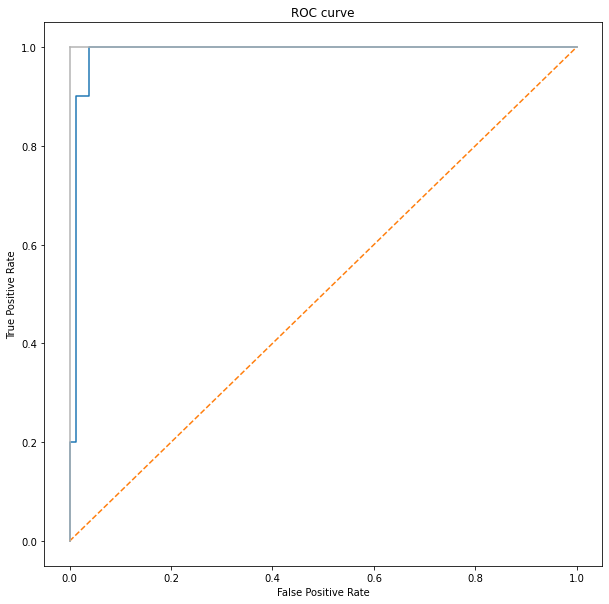

In [8]:
x_test_pred_prob = grid_KNN.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualizing Scores

<AxesSubplot:>

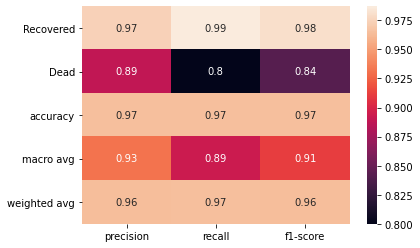

In [9]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       y_pred,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# => Naive bayes Classifier

## choose best CV for best recall

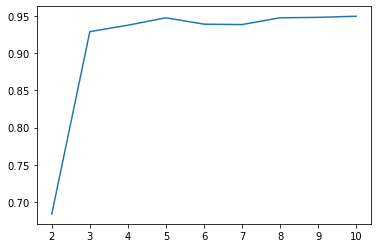

In [10]:
cv_scores = []
i_range = list(range (2,11))

for i in i_range:
    scores = cross_val_score(GaussianNB() , X_train, y_train, cv = i,scoring='recall')
    cv_scores.append(scores.mean())
    
plt.plot(i_range, cv_scores)

## defining classifier with best CV

In [11]:
param_grid = dict()
  
# defining parameter range
grid_Nb = GridSearchCV(GaussianNB(), param_grid, cv=10,return_train_score=False,verbose=1)

# fitting the model for grid search
grid_Nb.fit(X_train, y_train)
y_pred = grid_Nb.predict(X_test)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


## Confusion matrix

In [12]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[56 21]
 [ 1  9]]


In [13]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

Naive_bayes_score = ["Naive bayes",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                     recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  0.3
recall_score :  0.9
roc_auc_score :  0.8136363636363636
f1_score :  0.45000000000000007
accuracy_score :  0.7471264367816092


## ROC curve

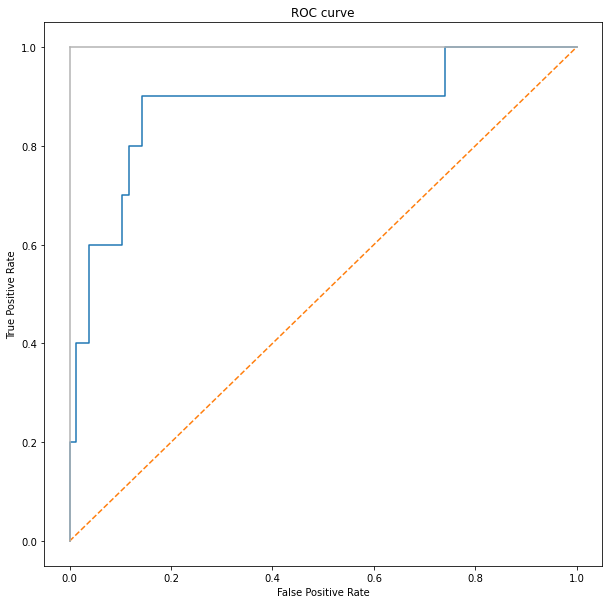

In [14]:
x_test_pred_prob = grid_Nb.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualizing Scores

<AxesSubplot:>

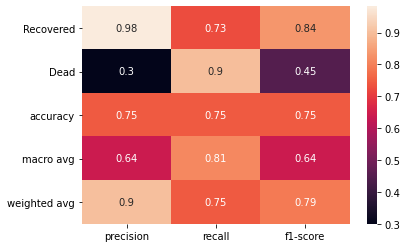

In [15]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       y_pred,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# => Decision Tree Classifier

## Tuning parameters in Decision Tree classifier

In [16]:
grid = dict(
    {
        'criterion' :['gini', 'entropy'],
        'max_features': ['auto', 'sqrt', 'log2'],
        'ccp_alpha': [0.1, .01, .001],
        'max_depth' : [5, 6, 7, 8, 9]
    }
)

grid_Dec_Tree = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=grid, n_jobs=-1, cv=8 ,\
                             verbose=1,scoring='recall')

grid_Dec_Tree.fit(X_train, y_train)
y_pred = grid_Dec_Tree.predict(X_test)

print(grid_Dec_Tree.best_params_)

Fitting 8 folds for each of 90 candidates, totalling 720 fits
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}


In [17]:
#define classifier with best parameters
Dec_Tree_clf = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'gini', max_depth = 9, max_features = 'auto',\
                                      random_state = 42)

Dec_Tree_clf.fit(X_train, y_train)
y_pred = Dec_Tree_clf.predict(X_test)

## Confusion matrix

In [18]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[77  0]
 [ 1  9]]


In [19]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

Decision_Tree_score = ["Decision Tree",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                       recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  1.0
recall_score :  0.9
roc_auc_score :  0.95
f1_score :  0.9473684210526316
accuracy_score :  0.9885057471264368


## ROC curve

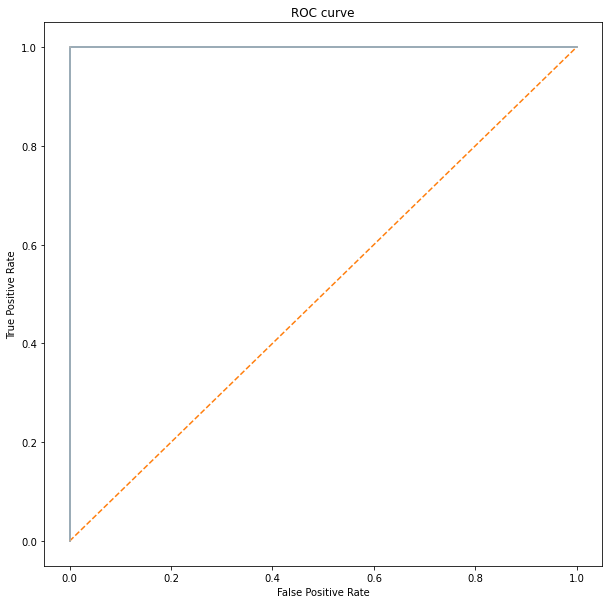

In [20]:
x_test_pred_prob = Dec_Tree_clf.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualizing Scores

<AxesSubplot:>

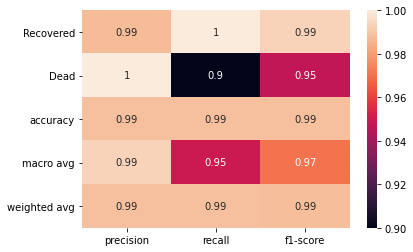

In [21]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       y_pred,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

## Visualizing Decision Tree 

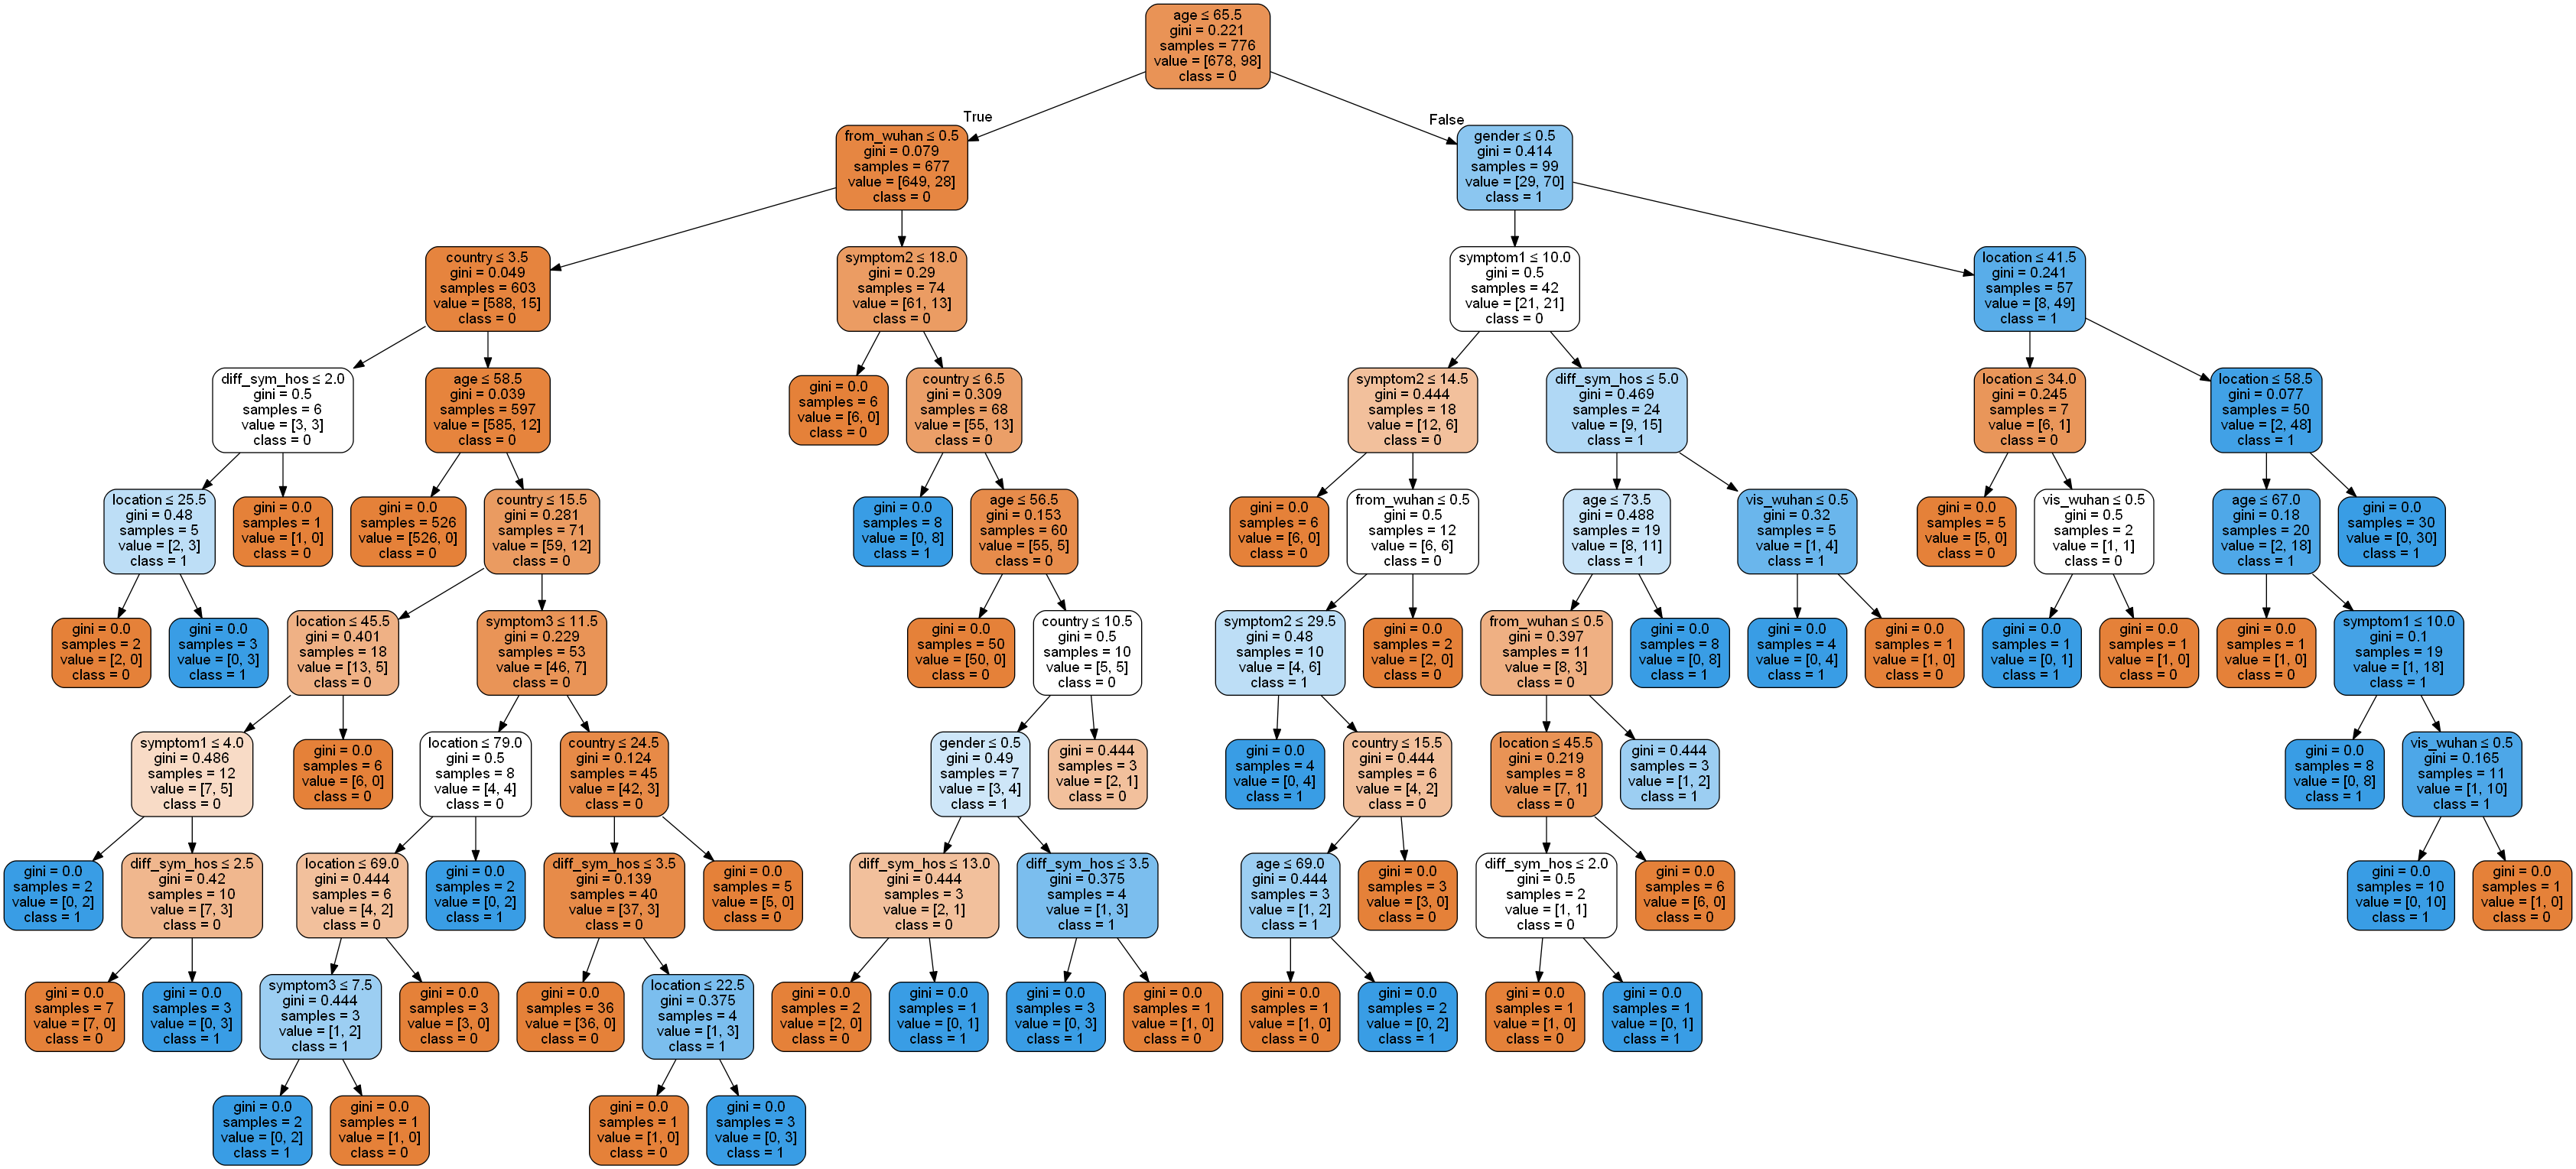

In [22]:
dot_data =StringIO()
export_graphviz(Dec_Tree_clf , out_file = dot_data, rounded =True , filled =True , special_characters =True ,\
               feature_names = feature_cols,class_names=["0","1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("result.png")
Image(graph.create_png())

# => Logistic regression Classifier

# Feature Scaling

In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Tuning parameters in Logistic regression classifier

In [24]:
# define grid search
grid = dict(
    {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
)

grid_LR = GridSearchCV(LogisticRegression(), param_grid=grid, n_jobs=-1, cv=5 ,error_score=0,verbose=1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_test)
print(grid_LR.best_params_)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
{'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


## confusion matrix 

In [25]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[77  0]
 [ 3  7]]


In [26]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

Logistic_regression_score = ["Logistic regression",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                       recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  1.0
recall_score :  0.7
roc_auc_score :  0.85
f1_score :  0.8235294117647058
accuracy_score :  0.9655172413793104


## ROC curve

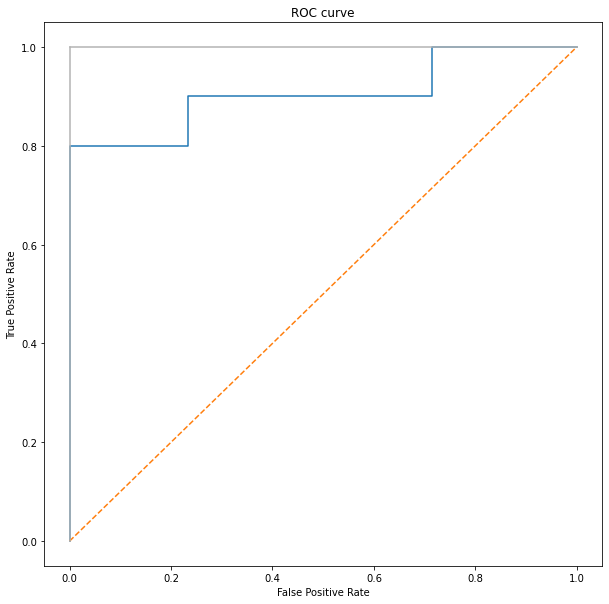

In [27]:
x_test_pred_prob = grid_LR.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualizing Scores

<AxesSubplot:>

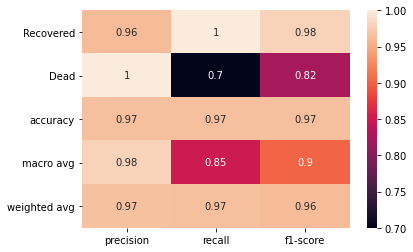

In [28]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       y_pred,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# => SVM Classifier

## Tuning parameters in SVM classifier

In [29]:
grid = dict(
    {
        'C': [0.1, 1, 10, 100, 1000],
        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    }
)

grid_SVM = GridSearchCV(SVC(probability=True), param_grid=grid, n_jobs=-1, cv=9 ,verbose=1,scoring='recall')
grid_SVM.fit(X_train, y_train)
y_pred = grid_SVM.predict(X_test)

print(grid_SVM.best_params_)

Fitting 9 folds for each of 25 candidates, totalling 225 fits
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


## Confusion matrix

In [30]:
con_matrix = confusion_matrix(y_test , y_pred)
print(con_matrix)

[[76  1]
 [ 1  9]]


In [31]:
print("precision_score : ",precision_score(y_test , y_pred))
print("recall_score : " ,recall_score(y_test , y_pred))
print("roc_auc_score : ",roc_auc_score(y_test , y_pred))
print("f1_score : ",f1_score(y_test , y_pred))
print("accuracy_score : ",accuracy_score(y_test,y_pred))

SVM_score = ["SVM",accuracy_score(y_test,y_pred),precision_score(y_test , y_pred),\
                       recall_score(y_test , y_pred),f1_score(y_test , y_pred),f1_score(y_test , y_pred)]

precision_score :  0.9
recall_score :  0.9
roc_auc_score :  0.9435064935064935
f1_score :  0.9
accuracy_score :  0.9770114942528736


## ROC curve

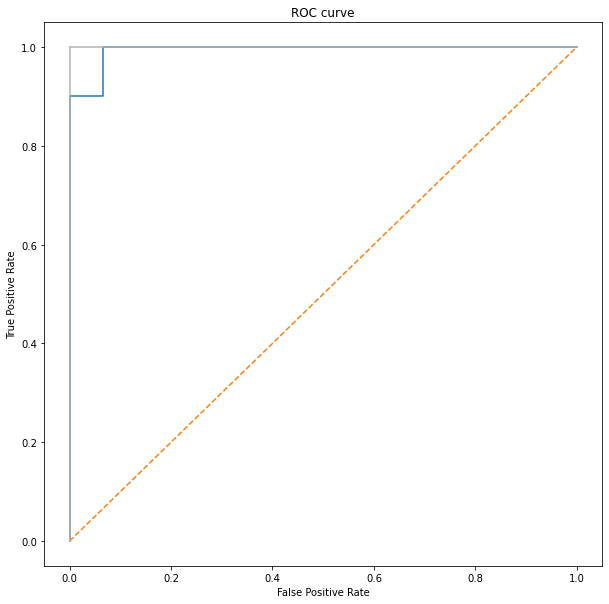

In [32]:
x_test_pred_prob = grid_SVM.predict_proba(X_test)[:,1]

fpr, tpr, thresh = roc_curve(y_test, x_test_pred_prob)
plt.subplots(1, figsize=(10,10))
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualizing Scores

<AxesSubplot:>

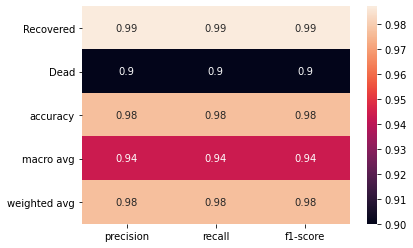

In [33]:
targets = ['Recovered','Dead']
clf_report = classification_report(y_test,
                                       y_pred,
                                       target_names=targets,
                                       output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# => comparision between Classifier 

In [34]:
column_names = ["Classifier", "Accuracy", "precision","Recall","F1 score","ROC/AUC"]

Data = [KNN_score , Naive_bayes_score , Decision_Tree_score , Logistic_regression_score , SVM_score]

comparision_df = pd.DataFrame(Data , columns = column_names)

comparision_df

,Classifier,Accuracy,precision,Recall,F1 score,ROC/AUC
0,KNN,0.965517,0.888889,0.8,0.842105,0.842105
1,Naive bayes,0.747126,0.300000,0.9,0.450000,0.450000
2,Decision Tree,0.988506,1.000000,0.9,0.947368,0.947368
3,Logistic regression,0.965517,1.000000,0.7,0.823529,0.823529
4,SVM,0.977011,0.900000,0.9,0.900000,0.900000
